In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# csv dosyasını import ettim
student_data = pd.read_csv("/content/Student_Performance.csv")

In [ ]:
# verilere bakmak için ilk 10 değeri çağırdım
student_data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [ ]:
# matematiksel değerleri çağırdım
student_data.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# kaça kaç boyutlu olduğuna baktım
student_data.shape

(10000, 6)

In [ ]:
# veride boş değer var mı diye kontrol ettim
student_data.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
# performansların kaç tane verisi olduğuna baktım
student_data.groupby("Performance Index").count()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
Performance Index,,,,,
10.0,1,1,1,1,1
11.0,5,5,5,5,5
12.0,8,8,8,8,8
13.0,13,13,13,13,13
14.0,7,7,7,7,7
...,...,...,...,...,...
96.0,14,14,14,14,14
97.0,13,13,13,13,13
98.0,7,7,7,7,7


<Axes: xlabel='Performance Index', ylabel='Hours Studied'>

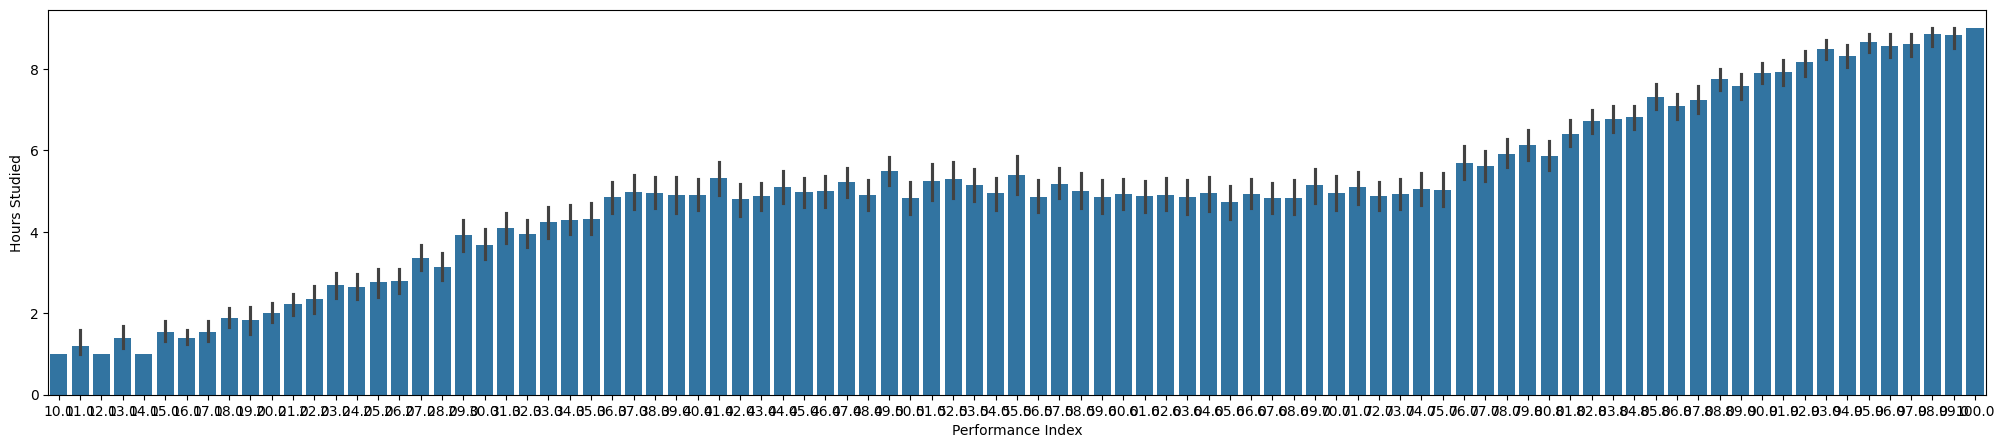

In [ ]:
plot = plt.figure(figsize = (25,5))
sns.barplot(x = "Performance Index", data = student_data, y ="Hours Studied")

<Axes: xlabel='Performance Index', ylabel='Previous Scores'>

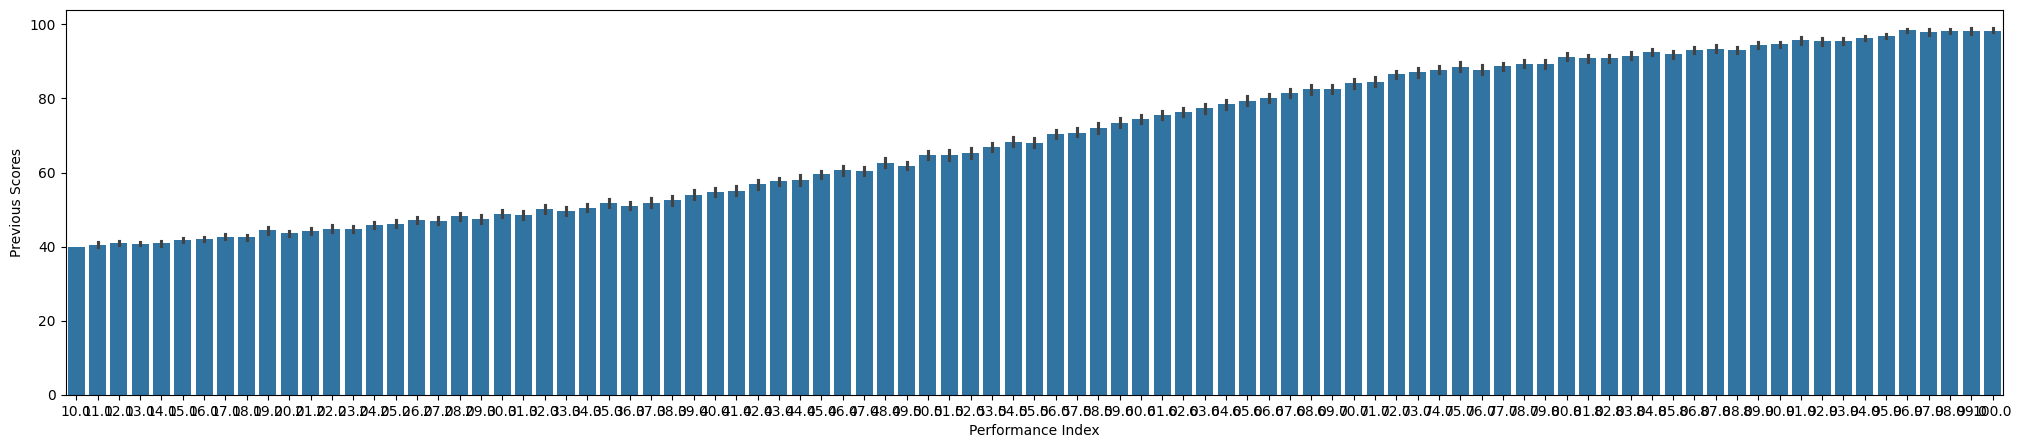

In [ ]:
plot = plt.figure(figsize = (25,5))
sns.barplot(x = "Performance Index", y = "Previous Scores", data = student_data)

<Axes: xlabel='Performance Index', ylabel='Sleep Hours'>

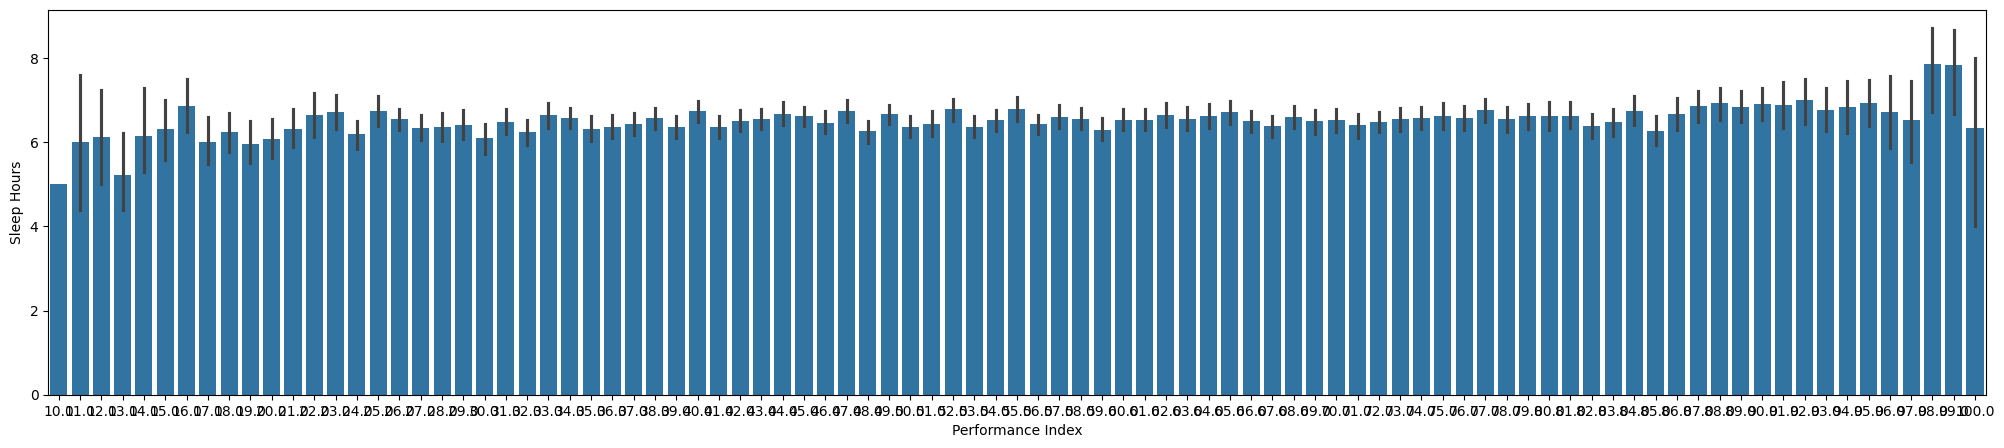

In [ ]:
plot = plt.figure(figsize = (25,5))
sns.barplot(x = "Performance Index", data = student_data, y ="Sleep Hours")

<Axes: xlabel='Performance Index', ylabel='Sample Question Papers Practiced'>

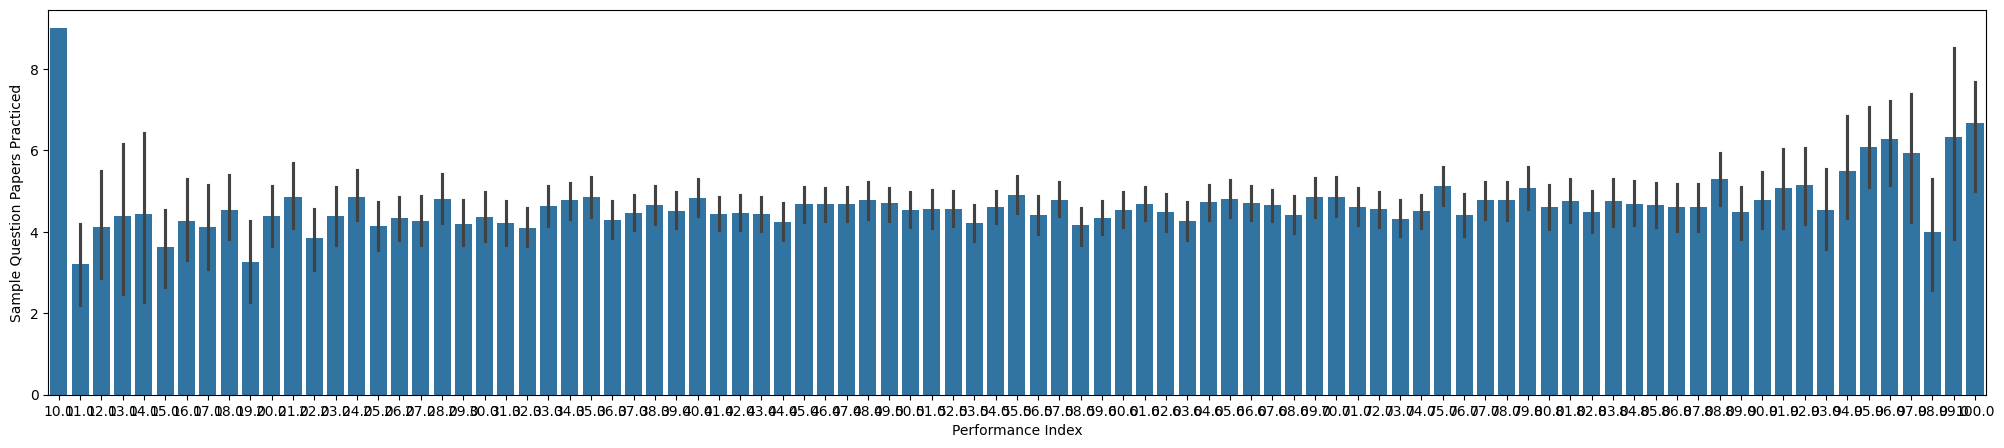

In [ ]:
plot = plt.figure(figsize = (25,5))
sns.barplot(x = "Performance Index", data = student_data, y ="Sample Question Papers Practiced")

In [ ]:
# verileri test edeceğim için performansları sildim ve performansları y ye attım.
z = student_data.drop("Performance Index", axis=1)
x = z.drop("Extracurricular Activities", axis=1)
y = student_data["Performance Index"]
x

# burada yes ve no sütunlarını 0ve1 yapmaya çalıştım o verileri de test edecektim ama yapamadım. nasıl yapılıyor

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [ ]:
# eğitim ve testleri hazırladım
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
y.shape, y_train.shape, y_test.shape

((10000,), (7000,), (3000,))

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
# doğruluk .ok az geldi anlamadım nerede hata yapmış olabilirim.
test_data_accuracy

0.142

In [ ]:
input_data = (7,75,8,5)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


[67.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
